In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [193]:
atData = pd.read_csv('Atlassian Marketplace Crawler modified.csv')
atData.drop('Unnamed: 0', inplace=True, axis=1)
atData.drop('Unnamed: 0.1', inplace=True, axis=1)


In [176]:
len(atData)

997

In [205]:
atData.shape

(997, 5)

In [194]:
atData.head()

,Name,Vendor,No of Installs,Price of Cloud Version,Price of Server Version,Price of Data Center Version,No of Ratings,Categories
0,Gliffy Diagrams for Confluence,Gliffy,20124,10.0,10,6250,744,"Blueprints,Charts & diagramming,Design tools,M..."
1,Jira Misc Workflow Extensions (JMWE),Innovalog Atlassian Apps (an Appfire company),17483,5.0,10,201,281,"Admin tools,IT & helpdesk,Project management,W..."
2,Xray Test Management for Jira,Xblend,16566,10.0,10,1250,314,"Custom fields,Dashboard gadgets,Testing & QA"
3,Zephyr Squad - Test Management for Jira,SmartBear,21717,10.0,200,3000,773,"Custom fields,Dashboard gadgets,Testing & QA"
4,JSU Automation Suite for Jira Workflows,Beecom Atlassian Apps (an Appfire company),17952,0.0,10,115,222,"Admin tools,Project management,Utilities,Workflow"


In [179]:
atData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          997 non-null    object 
 1   Vendor                        997 non-null    object 
 2   No of Installs                997 non-null    int64  
 3   Price of Cloud Version        997 non-null    float64
 4   Price of Server Version       997 non-null    int64  
 5   Price of Data Center Version  997 non-null    int64  
 6   No of Ratings                 997 non-null    object 
 7   Categories                    991 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.4+ KB


In [326]:
atData['No of Installs'] = atData['No of Installs'].replace(',', '',regex=True)
atData['No of Installs'] = atData['No of Installs'].replace('installs', '',regex=True)
atData['Price of Cloud Version'] = atData['Price of Cloud Version'].replace(',', '',regex=True)
atData['Price of Cloud Version'] = atData['Price of Cloud Version'].replace('USD', '',regex=True)
atData['Price of Server Version'] = atData['Price of Server Version'].replace(',', '',regex=True)
atData['Price of Server Version'] = atData['Price of Server Version'].replace('USD', '',regex=True)
atData['Price of Data Center Version'] = atData['Price of Data Center Version'].replace(',', '',regex=True)
atData['Price of Data Center Version'] = atData['Price of Data Center Version'].replace('USD', '',regex=True)
atData['Price of Cloud Version'] = atData['Price of Cloud Version'].replace('Free', 0,regex=True)
atData['Price of Server Version'] = atData['Price of Server Version'].replace('Free', 0,regex=True)
atData['Price of Data Center Version'] = atData['Price of Data Center Version'].replace('Free', 0,regex=True)
atData['No of Ratings'] = atData['No of Ratings'].replace('Not Rated', 0,regex=True)


In [343]:
atData['No of Installs'] = pd.to_numeric(atData['No of Installs'])
atData['Price of Cloud Version'] = pd.to_numeric(atData['Price of Cloud Version'])
atData['Price of Server Version'] = pd.to_numeric(atData['Price of Server Version'])
atData['Price of Data Center Version'] = pd.to_numeric(atData['Price of Data Center Version'])
atData['No of Ratings'] = pd.to_numeric(atData['No of Ratings'])

In [181]:
print(atData.dtypes)

Name                             object
Vendor                           object
No of Installs                    int64
Price of Cloud Version          float64
Price of Server Version           int64
Price of Data Center Version      int64
No of Ratings                    object
Categories                       object
dtype: object


In [83]:
atData.to_csv('Atlassian Marketplace Crawler modified.csv')

In [182]:
atData.describe(include = object)

,Name,Vendor,No of Ratings,Categories
count,997,997,997,991
unique,994,353,143,553
top,Figma for Jira,Bob Swift Atlassian Apps (an Appfire company),5,Admin tools
freq,2,31,56,24


In [183]:
TimeTdata = atData[atData['Categories'].str.contains('Time tracking', na = False)]
TimeTdata=TimeTdata.reset_index(drop=True)


In [128]:
TimeTdata.describe(include = object)
TimeTdata.to_csv('No of installs in Time Tracking.csv')

In [184]:
TimeTdata.head()

,Name,Vendor,No of Installs,Price of Cloud Version,Price of Server Version,Price of Data Center Version,No of Ratings,Categories
0,Tempo Timesheets - Time Tracking & Reports,Tempo for JIRA,28116,10.00,100,1500,434,"Dashboard gadgets,Integrations,Reports,Time tr..."
1,Better PDF Exporter for Jira,Midori Global Consulting Kft.,3806,0.99,10,640,291,"Charts & diagramming,Documentation,Reports,Tim..."
2,Timesheet tracking for Jira,TouchDown,14573,0.00,0,0,97,"Charts & diagramming,Project management,Report..."
3,Timesheet Reports & Gadgets,"Prime Timesheet, s.r.o",11558,5.00,10,500,231,"Dashboard gadgets,Reports,Time tracking"
4,Planning Poker ®,Lizard Brain Atlassian Apps (an Appfire company),2126,10.00,10,690,108,"Continuous integration,Project management,Time..."


## Graph

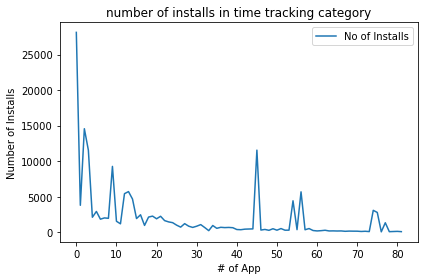

In [199]:
TimeTdata[['Name', 'No of Installs']].plot(
    #x='Name',
    xlabel='# of App',
    ylabel='Number of Installs',
    title='number of installs in time tracking category'
)

plt.show()

## Bar Chart

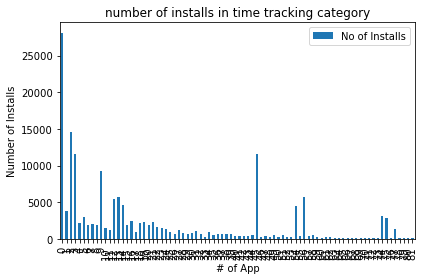

In [200]:
TimeTdata[['Name', 'No of Installs']].plot.bar(
    #x='Name',
    xlabel='# of App',
    ylabel='Number of Installs',
    title='number of installs in time tracking category'
)

plt.show()

In [190]:
print(len(atData.columns))

5


Using a filter method, filtering non important columns outm in this example, name, vendor and categories are redundant

In [196]:
atData.drop('Name', inplace=True, axis=1)
atData.drop('Vendor', inplace=True, axis=1)
atData.drop('Categories', inplace=True, axis=1)



In [197]:
atData.head()


,No of Installs,Price of Cloud Version,Price of Server Version,Price of Data Center Version,No of Ratings
0,20124,10.0,10,6250,744
1,17483,5.0,10,201,281
2,16566,10.0,10,1250,314
3,21717,10.0,200,3000,773
4,17952,0.0,10,115,222


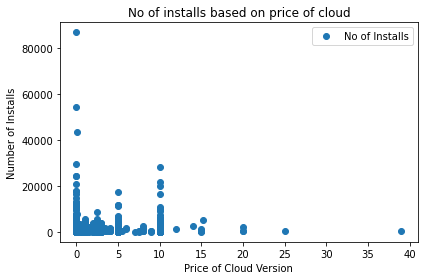

In [227]:
atData.plot(x='Price of Cloud Version', y='No of Installs', style='o')  
plt.title('No of installs based on price of cloud')  
plt.xlabel('Price of Cloud Version')  
plt.ylabel('Number of Installs')  
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='No of Installs', ylabel='Density'>

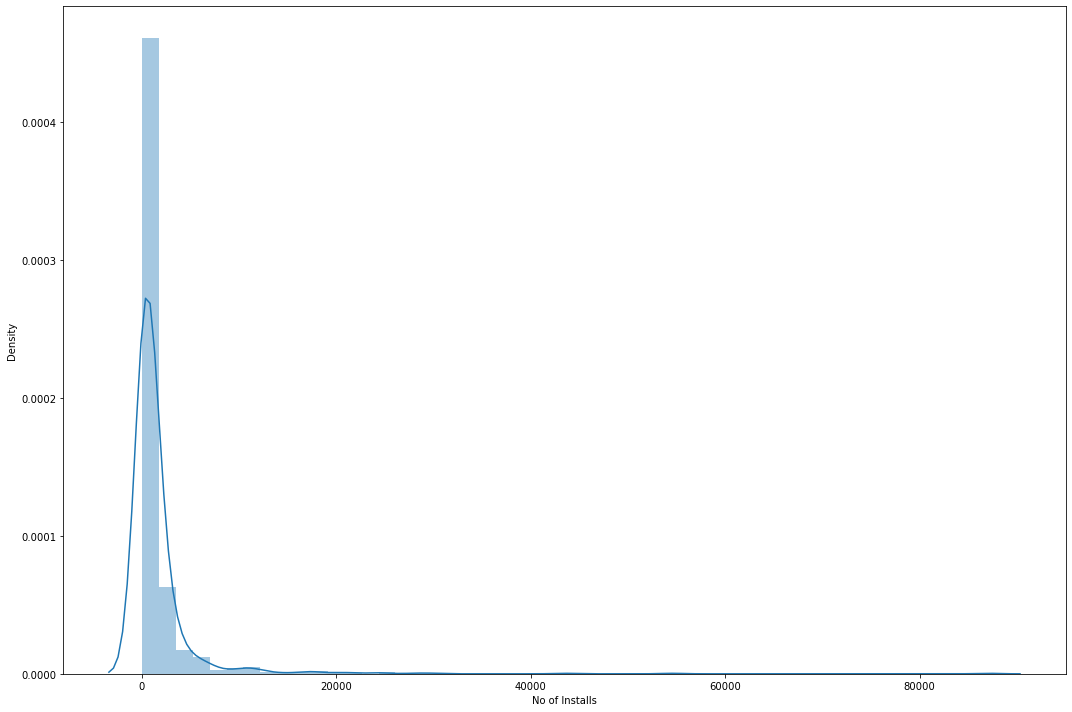

In [208]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(atData['No of Installs'])

In [378]:
X = atData['Price of Cloud Version'].values.reshape(-1, 1)
y = atData['No of Installs'].values.reshape(-1,1)


In [379]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [380]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [381]:
print(regressor.intercept_)
print(regressor.coef_)

[1490.92340743]
[[39.13181343]]


In [382]:
y_pred = regressor.predict(X_test)

In [383]:
comparedf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparedf

,Actual,Predicted
0,1165,1512.445905
1,320,1686.582475
2,7938,1494.836589
3,671,1490.923407
4,274,1882.241542
...,...,...
195,112,1490.923407
196,192,1490.923407
197,751,1549.621128
198,717,1490.923407


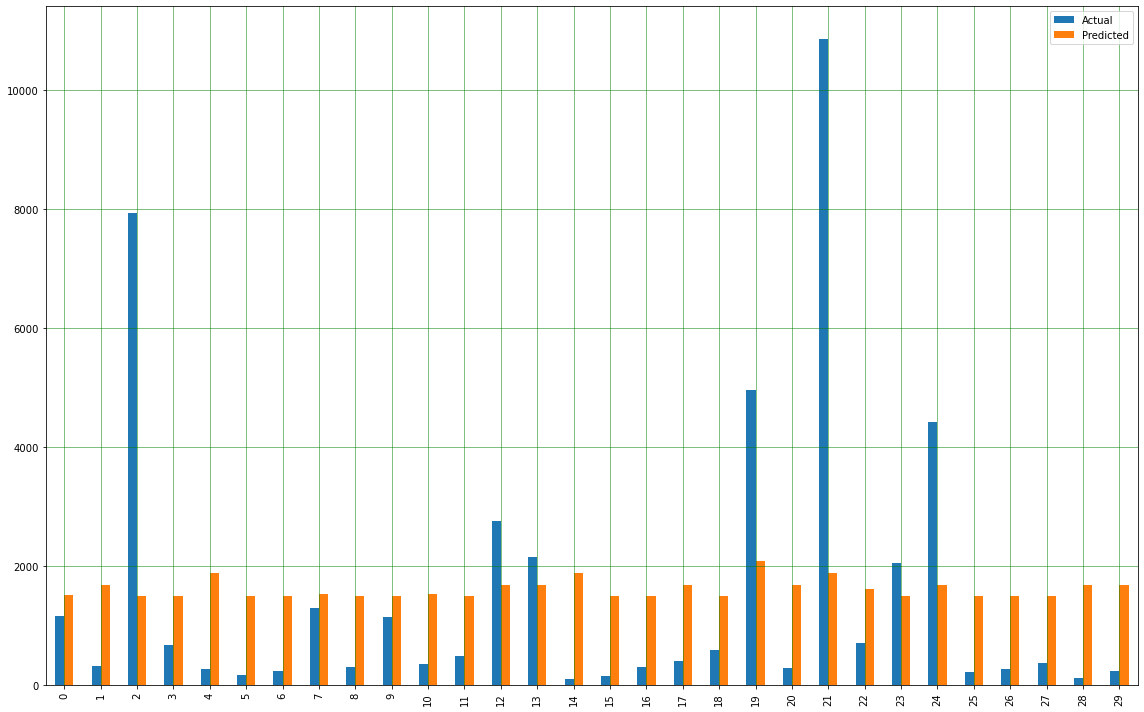

In [384]:
comparedfa = comparedf.head(30)
comparedfa.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

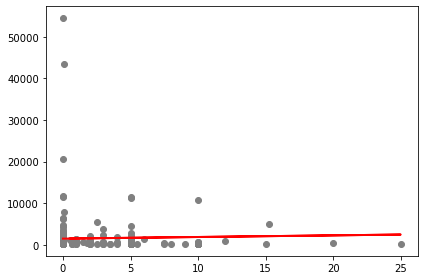

In [385]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [386]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print(metrics.r2_score(y_t, y_pred))



Root Mean Squared Error: 5395.821380544915
Mean Squared Error: 29114888.37074563
Mean Absolute Error: 2005.1077193616538
-0.004726917112295448


In [303]:
X1 = atData['Price of Server Version'].values.reshape(-1, 1)

y1 = atData['No of Installs'].values.reshape(-1, 1)


In [304]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)


In [305]:
regressor1 = LinearRegression()  
regressor1.fit(X1_train, y1_train)

LinearRegression()

In [306]:
print(regressor1.intercept_)
print(regressor1.coef_)

[1640.60359145]
[[-0.2197015]]


In [307]:
y1_pred = regressor1.predict(X1_test)

In [308]:
comparedf1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred.flatten()})
comparedf1

,Actual,Predicted
0,1165,1640.603591
1,320,1636.429263
2,7938,1638.406576
3,671,1618.633441
4,274,1638.406576
...,...,...
195,112,1596.663291
196,192,1638.406576
197,751,1638.406576
198,717,1532.949856


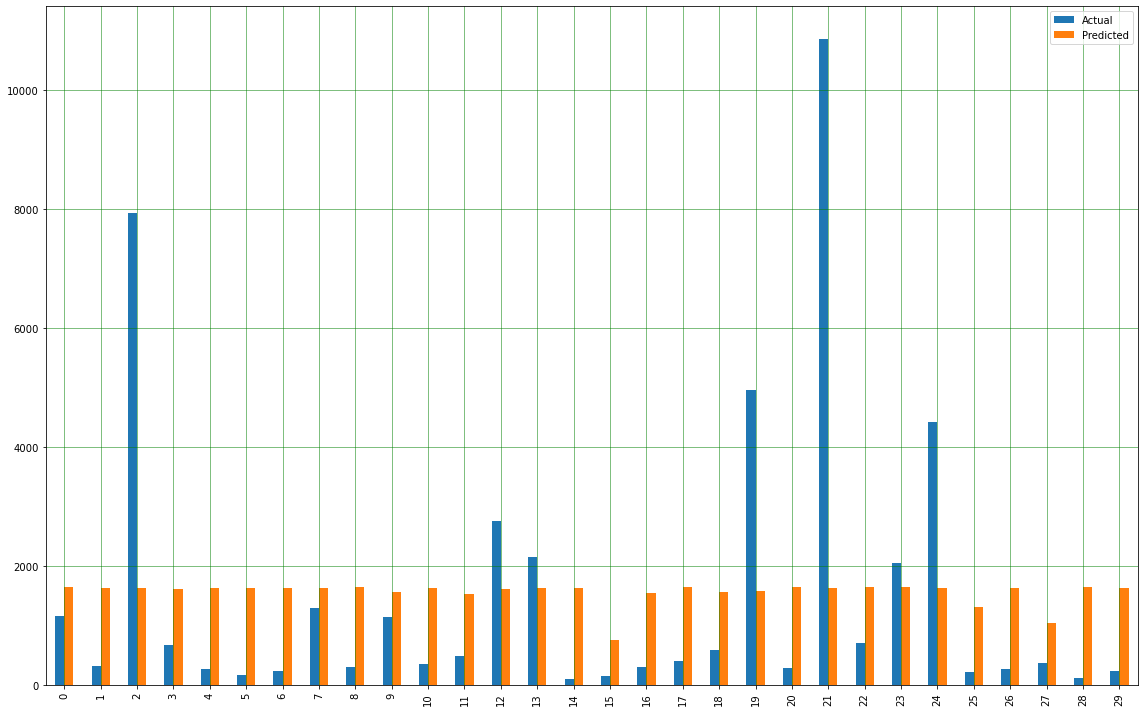

In [309]:
comparedfa1 = comparedf1.head(30)
comparedfa1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

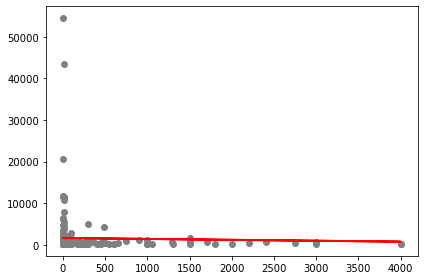

In [310]:
plt.scatter(X1_test, y1_test,  color='gray')
plt.plot(X1_test, y1_pred, color='red', linewidth=2)
plt.show()

In [320]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  


Root Mean Squared Error: 5373.3922977413395
Mean Squared Error: 28873344.78542595
Mean Absolute Error: 1980.632801063779


In [312]:
X2 = atData['Price of Data Center Version'].values.reshape(-1, 1)

y2 = atData['No of Installs'].values.reshape(-1, 1)


In [313]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)


In [314]:
regressor2 = LinearRegression()  
regressor2.fit(X2_train, y2_train)

LinearRegression()

In [315]:
print(regressor2.intercept_)
print(regressor2.coef_)

[1415.42844405]
[[0.46221993]]


In [316]:
y2_pred = regressor2.predict(X2_test)

In [317]:
comparedf2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_pred.flatten()})
comparedf2

,Actual,Predicted
0,1165,1415.428444
1,320,1415.428444
2,7938,1526.361227
3,671,2108.758337
4,274,1577.205419
...,...,...
195,112,1415.428444
196,192,1762.093391
197,751,1415.428444
198,717,1415.428444


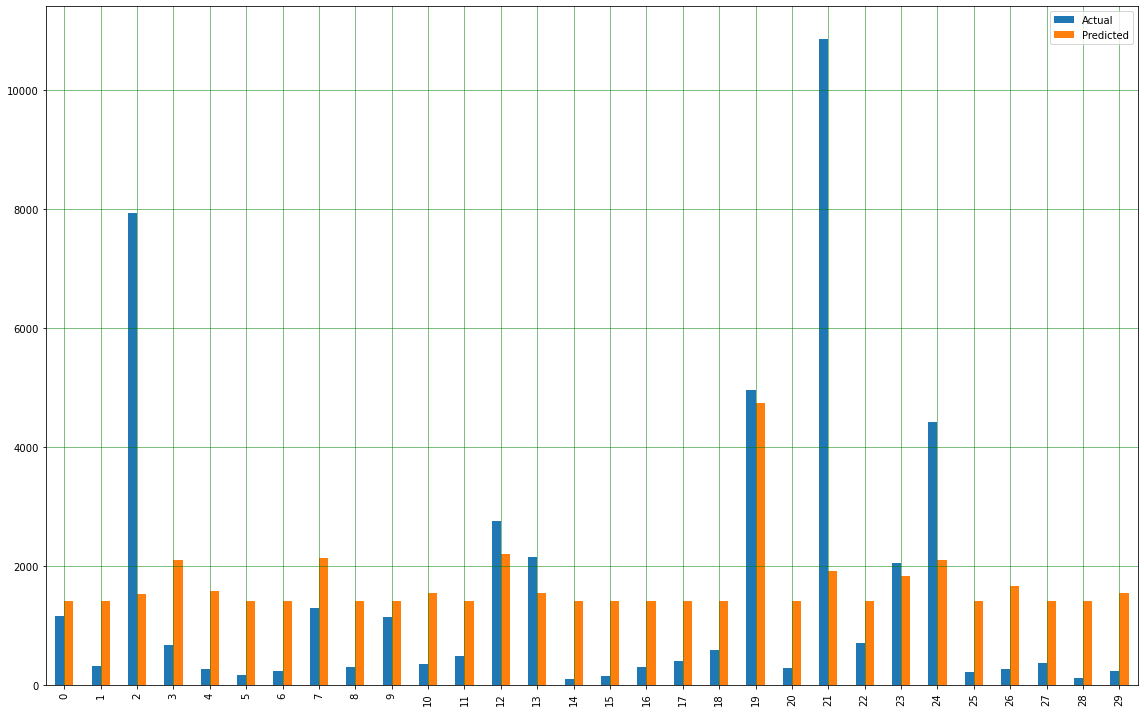

In [318]:
comparedfa2 = comparedf2.head(30)
comparedfa2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

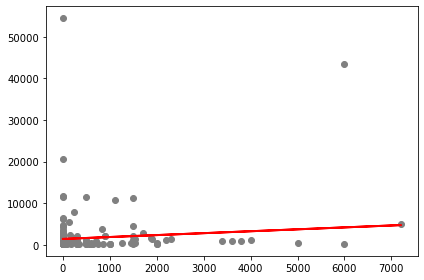

In [341]:
plt.scatter(X2_test, y2_test,  color='gray')
plt.plot(X2_test, y2_pred, color='red', linewidth=2)
plt.show()

In [321]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))  

Root Mean Squared Error: 5298.983807301972
Mean Squared Error: 28079229.3900485
Mean Absolute Error: 1976.3825535694514


In [344]:
X3 = atData['No of Ratings'].values.reshape(-1, 1)

y3 = atData['No of Installs'].values.reshape(-1, 1)

In [345]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)


In [346]:
regressor3 = LinearRegression()  
regressor3.fit(X3_train, y3_train)

LinearRegression()

In [347]:
print(regressor3.intercept_)
print(regressor3.coef_)

[172.42439511]
[[42.67048855]]


In [348]:
y3_pred = regressor3.predict(X3_test)

In [349]:
comparedf3 = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_pred.flatten()})
comparedf3

,Actual,Predicted
0,1165,1196.516120
1,320,812.481723
2,7938,13101.582425
3,671,897.822700
4,274,428.447326
...,...,...
195,112,556.458792
196,192,897.822700
197,751,1025.834166
198,717,3074.017616


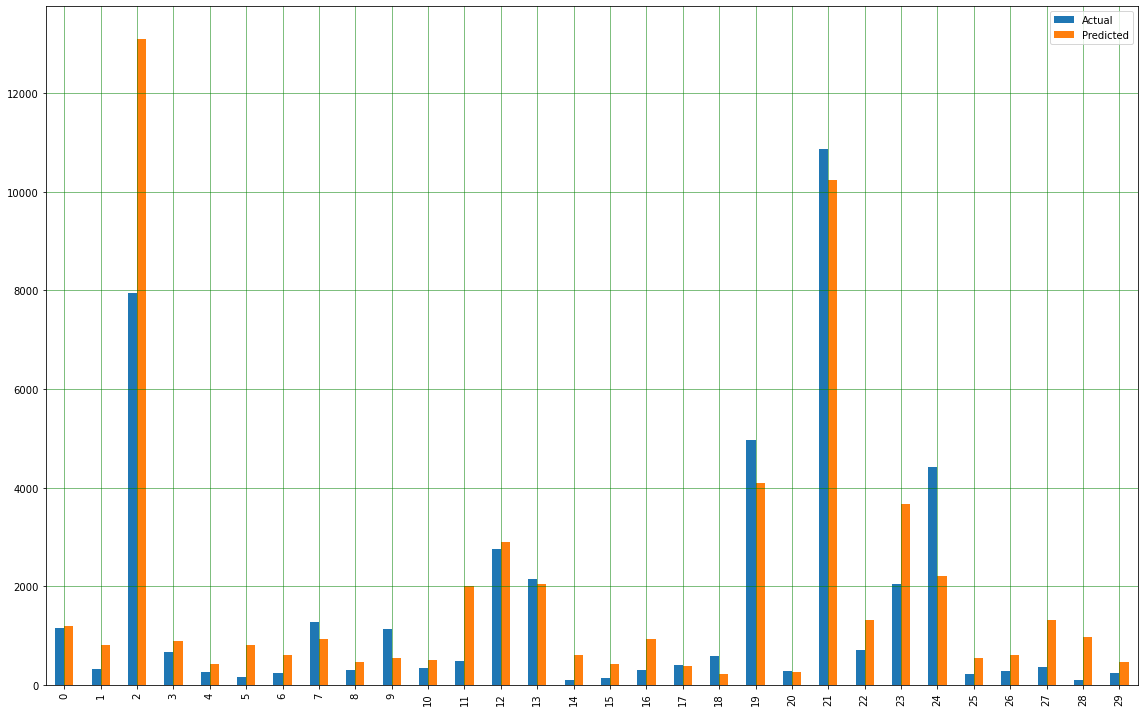

In [350]:
comparedfa3 = comparedf3.head(30)
comparedfa3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

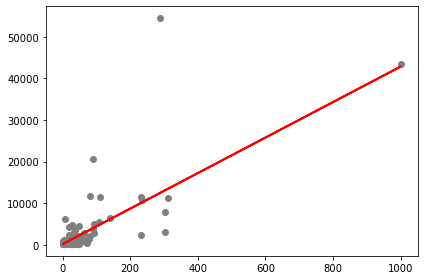

In [351]:
plt.scatter(X3_test, y3_test,  color='gray')
plt.plot(X3_test, y3_pred, color='red', linewidth=2)
plt.show()

In [389]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y3_pred))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred))  
print(metrics.r2_score(y_test, y3_pred))


Root Mean Squared Error: 3540.3752798400296
Mean Squared Error: 12534257.122102369
Mean Absolute Error: 1049.000739553146
0.5674547895833053
